# Modelling Notebook

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge

### Trip data

In [2]:
pd.read_csv("data/trip_data.csv").head()

,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type
0,913460,31/08/2015 23:26,50,31/08/2015 23:39,70,Subscriber
1,913459,31/08/2015 23:11,31,31/08/2015 23:28,27,Subscriber
2,913455,31/08/2015 23:13,47,31/08/2015 23:18,64,Subscriber
3,913454,31/08/2015 23:10,10,31/08/2015 23:17,8,Subscriber
4,913453,31/08/2015 23:09,51,31/08/2015 23:22,60,Customer


### Station data

In [3]:
pd.read_csv("data/station_data.csv").head()

,Id,Name,Lat,Long,Dock Count,City
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose


### Weather data

In [4]:
pd.read_csv("data/weather_data.csv").head()

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,Zip
0,01/09/2014,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,...,10.0,8.0,16.0,7.0,20.0,0.0,0.0,NaN,290.0,94107
1,02/09/2014,72.0,66.0,60.0,58.0,57.0,55.0,84.0,73.0,61.0,...,10.0,7.0,21.0,8.0,NaN,0.0,5.0,NaN,290.0,94107
2,03/09/2014,76.0,69.0,61.0,57.0,56.0,55.0,84.0,69.0,53.0,...,10.0,10.0,21.0,8.0,24.0,0.0,4.0,NaN,276.0,94107
3,04/09/2014,74.0,68.0,61.0,57.0,57.0,56.0,84.0,71.0,57.0,...,10.0,8.0,22.0,8.0,25.0,0.0,5.0,NaN,301.0,94107
4,05/09/2014,72.0,66.0,60.0,57.0,56.0,54.0,84.0,71.0,57.0,...,9.0,7.0,18.0,8.0,32.0,0.0,4.0,NaN,309.0,94107


# Modelling

### Loading training dataset

In [284]:
training = pd.read_csv("data/training_set_2.csv")

In [285]:
training.head()

,Unnamed: 0,hour,station,net,City,temp,PrecipitationIn,wind_speed,is_raining,is_weekday,is_winter,time_of_day
0,1,8,70,-37,San Francisco,53,0.0,3,0,1,1,Morning
1,2,8,70,-24,San Francisco,51,0.0,2,0,1,1,Morning
2,3,8,70,-28,San Francisco,57,0.0,5,0,1,1,Morning
3,4,8,88,-35,San Francisco,62,0.0,9,0,1,0,Morning
4,5,8,70,-18,San Francisco,49,0.0,3,0,1,1,Morning


In [286]:
## Dropping unnecessary columns
training = training.drop(['Unnamed: 0','station','hour','City'],axis=1)#,'hour','PrecipitationIn','station','City'],axis=1)

### Note: Station 70

For the exercise, we've picked Station 70 and we'll make a model specific to this station. Similarly, the same exact methods can be used to make a model for each of the other corresponding stations.

In [189]:
training = training.query("station==70")

In [282]:
training.head()

,net,temp,PrecipitationIn,wind_speed,is_raining,is_weekday,is_winter,time_of_day
0,-37,53,0.0,3,0,1,1,Morning
1,-24,51,0.0,2,0,1,1,Morning
2,-28,57,0.0,5,0,1,1,Morning
4,-18,49,0.0,3,0,1,1,Morning
5,-24,53,0.0,3,0,1,1,Morning


### Feature Selection

In [192]:
# Choosing these features after looking at feature importances
features = ['time_of_day','is_weekday','is_raining']

In [193]:
y = training.net
X = training[features]

In [194]:
X_full = pd.get_dummies(X,drop_first=True)

In [195]:
X_full.head()

,is_weekday,is_raining,time_of_day_Midday,time_of_day_Morning,time_of_day_Night,time_of_day_Overnight
0,1,0,0,1,0,0
1,1,0,0,1,0,0
2,1,0,0,1,0,0
4,1,0,0,1,0,0
5,1,0,0,1,0,0


### Looking at correlations

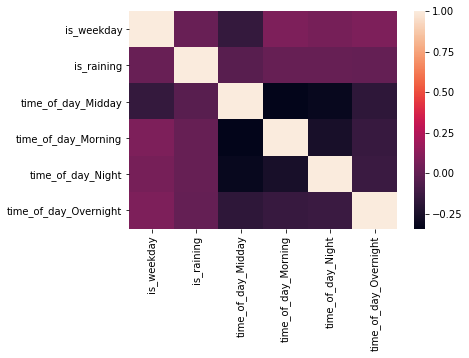

In [196]:
sns.heatmap(X_full.corr())

### Creating Train and Test sets

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size = 0.2, random_state = 888)

### Random Forest Regressor

In [198]:
from sklearn.ensemble import RandomForestRegressor

In [199]:
model_rf = RandomForestRegressor()

In [200]:
model_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [201]:
model_rf.score(X_train,y_train)

0.6771855846137153

In [202]:
model_rf.score(X_test,y_test)

0.6937154543979368

In [214]:
model_rf.feature_importances_

array([0.11979406, 0.00164348, 0.09845   , 0.32710322, 0.21483351,
       0.23817574])

In [273]:
importances = pd.DataFrame(columns = ['Feature','Importance'])
for i in zip(X_full.columns,model_rf.feature_importances_):
    importances = importances.append({'Feature':i[0],'Importance':i[1]},ignore_index=True)
importances

,Feature,Importance
0,is_weekday,0.119794
1,is_raining,0.001643
2,time_of_day_Midday,0.098450
3,time_of_day_Morning,0.327103
4,time_of_day_Night,0.214834
5,time_of_day_Overnight,0.238176


In [274]:
y_pred = model_rf.predict(X_test)

In [276]:
from sklearn.metrics import mean_squared_error

In [277]:
mean_squared_error(y_pred,y_test)

32.669895459092174

### Linear Regression

In [203]:
model_1 = LinearRegression()

In [204]:
model_1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [205]:
model_1.score(X_train,y_train)

0.6114326662643561

In [206]:
model_1.score(X_test,y_test)

0.6345742723492518

In [278]:
y_pred_2 = model_1.predict(X_test)

#### Mean squared error

In [279]:
mean_squared_error(y_pred_2,y_test)

38.97820014700805

### Ridge Regression

In [166]:
ridge = Ridge()

In [207]:
ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [208]:
ridge.score(X_train,y_train)

0.6113978829153535

In [209]:
ridge.score(X_test,y_test)

0.6342933956682599

In [280]:
y_pred_3 = ridge.predict(X_test)

#### Mean squared error

In [281]:
mean_squared_error(y_pred_3,y_test)

39.00815990807553

### Summary table

|Model   |RMSE    |Accuracy   |
|---|----|---|
|**RF Regressor** |**32** |**69%** |
|Simple Linear Regression|38.9|63%|
|Ridge Regression|39 |63% |

### Conclusion

- Random Forest Regressor achieved the lowest RMSE out of the models tested and highest score on the test set
- Exploratory data analysis played a big role in determining which features to engineer
- Still a very large error that could be due to many factors including: Lack of granularity, missing important factors in training set, lack of hyperparameter tuning
- Potential to get impactful results is there. With basic models and no hyperparameter tuning, achieved 70% accuracy with RF regressor. This means with feature engineering, HP tuning, and more advanced models; RMSE can be lowered substantially to create a reliable predictive model.

### Further Improvements

- Factoring in more variables such as holidays, conferences, sports events
- More feature engineering from available datasets: i.e. Incorporating more of the weather dataset, which was only used for the is_raining variable here
- Clustering stations and building model for each cluster
- Using convolutional neural networks and other deep learning methods to capture spatio-temporal dependencies between stations
- Prediction to the hour rather than by grouped time
- Tuning hyperparameters using Grid/RandomSearch and Validation set
- Trying different Gradient Boosting models such as Adaboost, XGboost